In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
os.chdir('../')
os.chdir('preprocessing/data_cleaning')
from data_cleaning import DataCleaning
os.chdir('../')
os.chdir('../')
os.chdir('models')
from KNN_and_Tree import SpecialKNN

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor, plot_importance
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import NearestNeighbors

In [2]:
data_cleaner = DataCleaning(path="C:/Users/Admin/Documents/ML project/ml-project/data/train_airbnb_berlin.csv")
data_cleaner.data_cleaning(csv_name="train_airbnb_berlin_cleaned.csv")
df = data_cleaner.df

train,test = train_test_split(df,random_state=0)
F = ['Beds','Bathrooms','Bedrooms','Accomodates','Guests Included','Room Type_Entire home/apt',
     'Property Type_Apartment']
B = ['Longitude','Latitude']

In [3]:
model = SpecialKNN(50)
model2 = XGBRegressor()
model2.fit(train[F],train['Price'])
model.fit(train[B],train[F],train['Price'])

test['error'] = model.predict(test[B],test[F]) -test['Price']
train['error'] = model.predict(train[B],train[F])-train['Price']

Mean error :  20.92788862294066  euros
Relative mean error :  39.83833675008538 %
Quantile 1 :  -9.690273161145477  euros
Quantile 3 :  15.63926809232078  euros


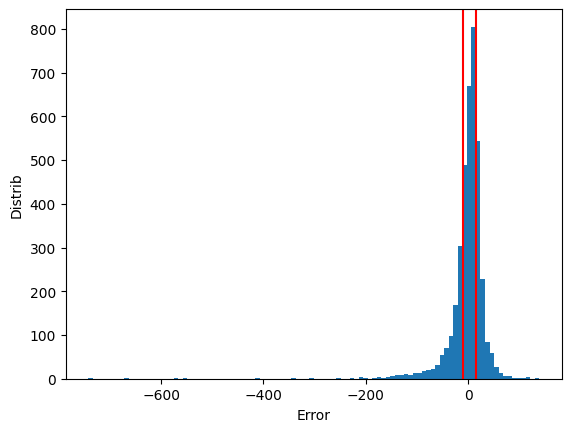

In [4]:
print('Mean error : ',np.mean(abs(test['error'])),' euros')
print('Relative mean error : ',np.mean(abs(test['error'])/test['Price'])*100,'%')
plt.hist(test['error'],bins=100)
Q = np.quantile(test['error'],[0.25,0.75])
plt.axvline(Q [0],color='r')
plt.axvline(Q[1],color='r')
plt.xlabel('Error')
plt.ylabel('Distrib')
print('Quantile 1 : ',Q[0],' euros')
print('Quantile 3 : ',Q[1],' euros')
plt.show()

Text(0, 0.5, 'Error')

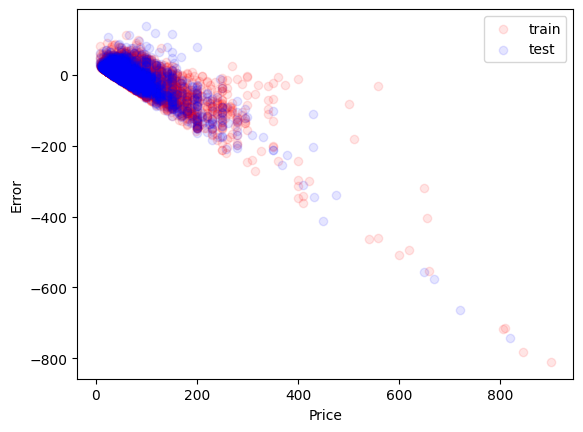

In [5]:
#Check error with y
y = 'Price'
plt.scatter(train[y],train['error'],color = 'r',alpha = 0.1,label='train')
plt.scatter(test[y],test['error'],color= 'b',alpha = 0.1,label='test')
plt.legend()
plt.xlabel(y)
plt.ylabel('Error')

In [6]:
y

'Price'

In [7]:
test['error']

2614    -65.699650
7077     77.152547
10411    -2.576607
10059     2.206255
5806     11.772544
           ...    
6577     13.952223
15250    -3.230610
413       2.959442
13916     5.616909
4388      9.168214
Name: error, Length: 3818, dtype: float64

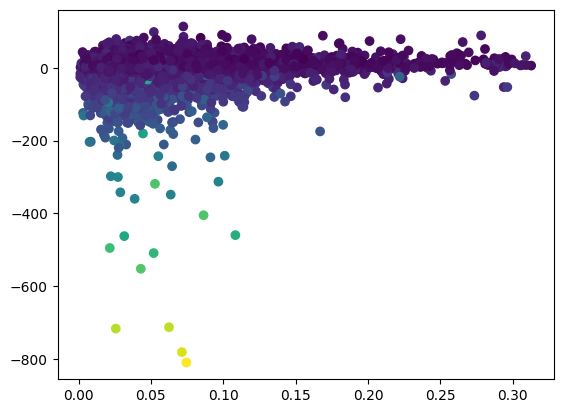

In [8]:
plt.scatter(train['dist_to_center'],train['error'],c=train['Price'])

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

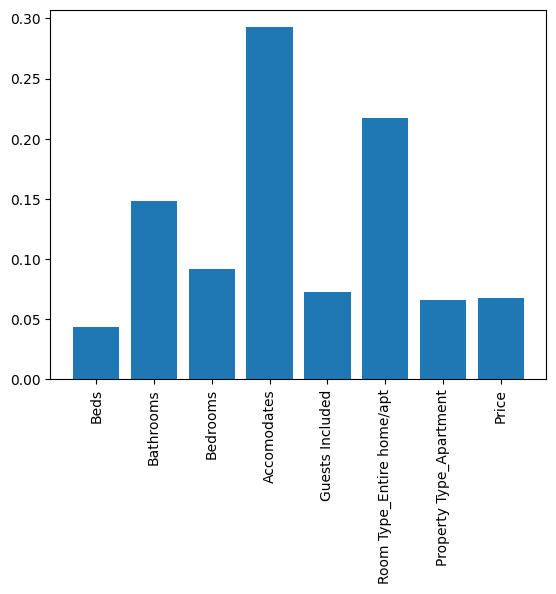

In [12]:
plt.bar(F+['Price'],model.feature_importances_)
plt.xticks(rotation=90)